# Minimize Errors

In [1]:
## import statements
# These lines load the tests. 
from gofer.ok import check
import numpy as np
from datascience import *
import pandas as pd
import matplotlib
from matplotlib import patches
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', FutureWarning)
plt.style.use('ggplot')
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
# Fix for datascience collections Iterable
import collections as collections
import collections.abc as abc
collections.Iterable = abc.Iterable

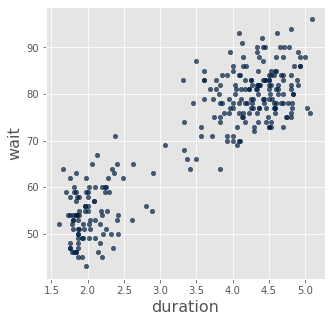

In [2]:
faithful = Table.read_table("../Lab08/faithful-new.csv")
faithful.scatter('duration','wait')

In [7]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))
# Regression
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))
def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

In [8]:
correlation(faithful,"duration","wait")

0.9008111683218132

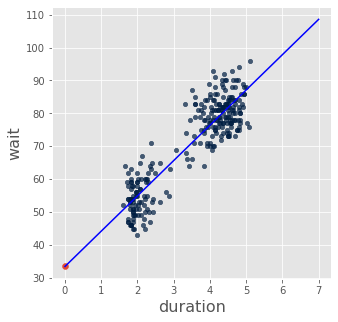

In [16]:
faithful.scatter('duration','wait')
slp = slope(faithful, 'duration','wait')
inter = intercept(faithful,'duration','wait')
plt.scatter(0,inter)
xs, ys = zip([0, inter], [7, slp*7+inter])
plt.plot(xs,ys, color='blue')
plt.show()

In [17]:
def mse_c(any_slope,any_intercept):
    tbl = faithful
    xlabel = 'duration'
    ylabel = 'wait'
    xdata, ydata = tbl.column(xlabel), tbl.column(ylabel)
    fitted = any_slope * xdata + any_intercept
    mse = np.mean((ydata - fitted) ** 2)
    print("Root mean squared error:", mse ** 0.5)
    return mse

In [18]:
mse_c(5,5)

Root mean squared error: 49.249566076582006


2425.5197587316175

In [19]:
minimize(mse_c)

Root mean squared error: 72.18404785481265
Root mean squared error: 72.18404785481265
Root mean squared error: 68.5682096253914
Root mean squared error: 62.73077176330615
Root mean squared error: 11.94781078241116
Root mean squared error: 100.35627147535786
Root mean squared error: 11.94781078241116
Root mean squared error: 39.89132542313638
Root mean squared error: 26.382831282775708
Root mean squared error: 11.969000006289964
Root mean squared error: 11.969000006290372
Root mean squared error: 11.94781078241116
Root mean squared error: 11.717319953749593
Root mean squared error: 11.519806152741335
Root mean squared error: 11.503683385009658
Root mean squared error: 11.54584565410414
Root mean squared error: 11.503683385009658
Root mean squared error: 11.50984439974767
Root mean squared error: 11.50603707259258
Root mean squared error: 11.503728654990736
Root mean squared error: 11.503728654990732
Root mean squared error: 78.00063235265438
Root mean squared error: 11.503683385009658
R

array([10.72964138, 33.47439706])